### Tokenization

with NLTK

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
text = "Tokenization is a crucial step in natural language processing. It involves breaking down text into smaller units, such as words or sentences."

In [ ]:
word_tok = word_tokenize(text)
sent_tok = sent_tokenize(text)

print(f"sentace tokenize - {sent_tok}")
print(f"word tokenize - {word_tok}")

sentace tokenize - ['Tokenization is a crucial step in natural language processing.', 'It involves breaking down text into smaller units, such as words or sentences.']
word tokenize - ['Tokenization', 'is', 'a', 'crucial', 'step', 'in', 'natural', 'language', 'processing', '.', 'It', 'involves', 'breaking', 'down', 'text', 'into', 'smaller', 'units', ',', 'such', 'as', 'words', 'or', 'sentences', '.']


with Spacy


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
spacy_obj = nlp(text)

print(f"spacy object - {spacy_obj}")

spacy object - Tokenization is a crucial step in natural language processing. It involves breaking down text into smaller units, such as words or sentences.


In [ ]:
print("sentances are - ")
list(spacy_obj.sents)

sentances are - 


[Tokenization is a crucial step in natural language processing.,
 It involves breaking down text into smaller units, such as words or sentences.]

In [ ]:
print("words are - ")
list(spacy_obj.doc)

words are - 


[Tokenization,
 is,
 a,
 crucial,
 step,
 in,
 natural,
 language,
 processing,
 .,
 It,
 involves,
 breaking,
 down,
 text,
 into,
 smaller,
 units,
 ,,
 such,
 as,
 words,
 or,
 sentences,
 .]

### Stemming

with NLTK

In [ ]:
from nltk.stem import PorterStemmer, LancasterStemmer

In [ ]:
sentance = "Stemming is a technique used to reduce words to their base or root form. It helps in simplifying word variations."
word_tokens = word_tokenize(sentance)

porter = PorterStemmer()
lancaster = LancasterStemmer()

porter_stems = [porter.stem(word) for word in word_tokens]
lancaster_stems = [lancaster.stem(word) for word in word_tokens]

print(f"porter stems - {porter_stems}")
print(f"lancaster stems - {lancaster_stems}")

porter stems - ['stem', 'is', 'a', 'techniqu', 'use', 'to', 'reduc', 'word', 'to', 'their', 'base', 'or', 'root', 'form', '.', 'it', 'help', 'in', 'simplifi', 'word', 'variat', '.']
lancaster stems - ['stem', 'is', 'a', 'techn', 'us', 'to', 'reduc', 'word', 'to', 'their', 'bas', 'or', 'root', 'form', '.', 'it', 'help', 'in', 'simpl', 'word', 'vary', '.']


from scratch

In [ ]:
def stem(word):
  if word.endswith("ing"):
    word = word[:-3]
  elif word.endswith("ly"):
    word = word[:-2]
  return word

stem("running")

'runn'

### Lemmatize

with nltk

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer_nltk = WordNetLemmatizer()
lemmatized_sent = [lemmatizer_nltk.lemmatize(word) for word in word_tokens]

print(f"word net lemmatized words - {lemmatized_sent}")

[nltk_data] Downloading package wordnet to /root/nltk_data...


word net lemmatized words - ['Stemming', 'is', 'a', 'technique', 'used', 'to', 'reduce', 'word', 'to', 'their', 'base', 'or', 'root', 'form', '.', 'It', 'help', 'in', 'simplifying', 'word', 'variation', '.']


with spacy

In [ ]:
spacy_obj = nlp(sentance)
lemmatized_words = [word.lemma_ for word in spacy_obj]
print(f"lemmatized words with spacy - {lemmatized_words}")

lemmatized words with spacy - ['stemming', 'be', 'a', 'technique', 'use', 'to', 'reduce', 'word', 'to', 'their', 'base', 'or', 'root', 'form', '.', 'it', 'help', 'in', 'simplify', 'word', 'variation', '.']


from scratch

In [ ]:
def lemmatize(word):
  lemma_rule = {
      "running":"run",
      "runnable" : "run",
      # more rules
  }
  return lemma_rule.get(word, word)


lemmatize("running")

'run'

### NER

with spacy

In [ ]:
sentance = "NASA awarded Elon Musk’s SpaceX a $2.9 billion contract to build the lunar lander."
spacy_obj = nlp(sentance)
ner = [(ent.text, ent.label_)for ent in spacy_obj.ents]
print(ner)

[('NASA', 'ORG'), ('Elon Musk’s', 'PERSON'), ('$2.9 billion', 'MONEY')]


In [ ]:
for i in spacy_obj.ents:
  print(dir(i))
  print(type(i))
  break

['_', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_fix_dep_copy', '_vector', '_vector_norm', 'as_doc', 'char_span', 'conjuncts', 'doc', 'end', 'end_char', 'ent_id', 'ent_id_', 'ents', 'get_extension', 'get_lca_matrix', 'has_extension', 'has_vector', 'id', 'id_', 'kb_id', 'kb_id_', 'label', 'label_', 'lefts', 'lemma_', 'n_lefts', 'n_rights', 'noun_chunks', 'orth_', 'remove_extension', 'rights', 'root', 'sent', 'sentiment', 'sents', 'set_extension', 'similarity', 'start', 'start_char', 'subtree', 'tensor', 'text', 'text_with_ws', 'to_array', 'vector', 'vector_norm', 'vocab']
<class 'spacy.tokens.span.Span'>


### count vectorizer (BOW)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?', ]

vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(corpus)

print(f"shape of vector - {vectors.shape}")
print("vectors - ")
vectors.toarray()

shape of vector - (4, 9)
vectors - 


array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [ ]:
vectorizer.vocabulary_

{'this': 8,
 'is': 3,
 'the': 6,
 'first': 2,
 'document': 1,
 'second': 5,
 'and': 0,
 'third': 7,
 'one': 4}

In [ ]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

from scratch

In [ ]:
def count_transform(corpus):
  vocab = "".join(corpus)
  vocab = list(set(vocab.split()))

  vectors = []
  for sent in corpus:
    vec = [sent.count(word) for word in vocab]
    vectors.append(vec)

  return vectors, vocab

corpus = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?', ]
vectors, vocab = count_transform(corpus)
vectors

[[0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0],
 [0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 0, 1],
 [0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0],
 [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]]

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?', ]

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(corpus)

In [ ]:
vectors.toarray()

array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

In [ ]:
vectorizer.vocabulary_

{'this': 8,
 'is': 3,
 'the': 6,
 'first': 2,
 'document': 1,
 'second': 5,
 'and': 0,
 'third': 7,
 'one': 4}

In [ ]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

### N-grams

In [ ]:
from nltk import ngrams

sentance = "I very bored becuase of various factors"
words = nltk.word_tokenize(sentance)
n_grams = ngrams(words, 2)
list(n_grams)

[('I', 'very'),
 ('very', 'bored'),
 ('bored', 'becuase'),
 ('becuase', 'of'),
 ('of', 'various'),
 ('various', 'factors')]

from scratch

In [ ]:
def n_grams(sentance, n=2):
  words = sentance.split()
  res = []

  for i in range(len(words) -n +1):
    n_gram = tuple(words[i:i+n])
    res.append(n_gram)

  return res

n_grams("I am very happy and sad at the same time", n=3)

[('I', 'am', 'very'),
 ('am', 'very', 'happy'),
 ('very', 'happy', 'and'),
 ('happy', 'and', 'sad'),
 ('and', 'sad', 'at'),
 ('sad', 'at', 'the'),
 ('at', 'the', 'same'),
 ('the', 'same', 'time')]

### Word2vec

with spacy

In [ ]:
sentence = "The quick brown fox jumps over the lazy dog."
doc = nlp(sentence)

vectors = [(token.text, token.vector) for token in doc]
vectors[0]

('The',
 array([ 0.81509006, -0.32198337,  0.62654525,  1.571293  , -0.649505  ,
         0.10411613, -1.2337358 , -0.09840304, -0.71473044,  1.1976013 ,
         2.1092854 ,  1.6130351 , -0.32555962, -0.10818967, -0.55460376,
        -0.9375833 , -0.9329749 ,  1.7877443 , -1.3869377 , -0.3296976 ,
        -1.4456658 , -0.41869622, -0.9711025 , -1.306915  ,  1.3849477 ,
        -0.204012  ,  1.2894577 ,  0.3005892 ,  0.05159047,  0.90781   ,
         1.3101175 , -1.081714  ,  1.0761728 , -1.5438898 ,  0.17863572,
         1.0685898 ,  0.5189689 , -0.6806157 ,  0.35116836,  2.77146   ,
        -1.511271  ,  0.79204965, -1.2549461 ,  0.22101134, -1.1250675 ,
         0.02545004, -0.39643076,  1.3714892 ,  0.26509064,  1.2452886 ,
        -0.7699896 ,  0.3030269 ,  0.17006874,  0.9630966 ,  0.57846975,
         0.4739644 , -0.9299496 ,  1.6480181 , -0.54359305,  0.2771796 ,
        -0.9940378 ,  0.11064228, -0.53309715, -0.46165758,  0.5294686 ,
        -0.17385459, -0.12964728, -1.743332

In [ ]:
print(f"dimention of vector {(len(vectors[0][1]))}")

dimention of vector 96


with gensim

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
sentences = [
    "Word embeddings are dense vector representations of words.",
    "They capture semantic meanings of words.",
    "Word2Vec is a popular technique for learning word embeddings."
]

tokenized_sentance = [word_tokenize(sentance.lower()) for sentance in sentences]

model = Word2Vec(sentences=tokenized_sentance, vector_size=100, window=5, min_count=1, workers=4)

model.save("word2vec_model")

In [ ]:
word_vector = model.wv['word']
print("Vector for 'word':", word_vector)

Vector for 'word': [-8.6194659e-03  3.6653671e-03  5.1895776e-03  5.7422016e-03
  7.4683744e-03 -6.1674668e-03  1.1075315e-03  6.0484339e-03
 -2.8415760e-03 -6.1739697e-03 -4.1042618e-04 -8.3696628e-03
 -5.6000617e-03  7.1058292e-03  3.3529003e-03  7.2247400e-03
  6.8007912e-03  7.5322948e-03 -3.7882375e-03 -5.6325615e-04
  2.3489038e-03 -4.5198989e-03  8.3908578e-03 -9.8581268e-03
  6.7650727e-03  2.9148366e-03 -4.9342080e-03  4.3979506e-03
 -1.7393753e-03  6.7108534e-03  9.9670608e-03 -4.3619839e-03
 -5.9946708e-04 -5.6955204e-03  3.8506824e-03  2.7866042e-03
  6.8900003e-03  6.1013303e-03  9.5388610e-03  9.2711169e-03
  7.8989640e-03 -6.9908695e-03 -9.1551431e-03 -3.5548621e-04
 -3.0997954e-03  7.8945234e-03  5.9378901e-03 -1.5465776e-03
  1.5109853e-03  1.7890867e-03  7.8179603e-03 -9.5117977e-03
 -2.0569480e-04  3.4686923e-03 -9.3940354e-04  8.3808713e-03
  9.0100784e-03  6.5353015e-03 -7.1110885e-04  7.7088745e-03
 -8.5348347e-03  3.2063778e-03 -4.6353568e-03 -5.0883857e-03
  3.5

## **SpaCy** things

In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
  print(token.text,"==", token.pos_,"==", token.dep_)

Apple == PROPN == nsubj
is == AUX == aux
looking == VERB == ROOT
at == ADP == prep
buying == VERB == pcomp
U.K. == PROPN == dobj
startup == NOUN == dep
for == ADP == prep
$ == SYM == quantmod
1 == NUM == compound
billion == NUM == pobj


In [ ]:
for token in doc:
  print(f"{token.text}  ::  {token.lemma_}  ::  {token.pos_}  ::  {token.tag_}  ::  {token.dep_}  ::  ",
          f"{token.shape_}  ::  {token.is_alpha}  ::  {token.is_stop}")

Apple  ::  Apple  ::  PROPN  ::  NNP  ::  nsubj  ::   Xxxxx  ::  True  ::  False
is  ::  be  ::  AUX  ::  VBZ  ::  aux  ::   xx  ::  True  ::  True
looking  ::  look  ::  VERB  ::  VBG  ::  ROOT  ::   xxxx  ::  True  ::  False
at  ::  at  ::  ADP  ::  IN  ::  prep  ::   xx  ::  True  ::  True
buying  ::  buy  ::  VERB  ::  VBG  ::  pcomp  ::   xxxx  ::  True  ::  False
U.K.  ::  U.K.  ::  PROPN  ::  NNP  ::  dobj  ::   X.X.  ::  False  ::  False
startup  ::  startup  ::  NOUN  ::  NN  ::  dep  ::   xxxx  ::  True  ::  False
for  ::  for  ::  ADP  ::  IN  ::  prep  ::   xxx  ::  True  ::  True
$  ::  $  ::  SYM  ::  $  ::  quantmod  ::   $  ::  False  ::  False
1  ::  1  ::  NUM  ::  CD  ::  compound  ::   d  ::  False  ::  False
billion  ::  billion  ::  NUM  ::  CD  ::  pobj  ::   xxxx  ::  True  ::  False


In [ ]:
# entities
for ent in doc.ents:
  print(f"{ent.text}  --  {ent.start_char}  --  {ent.end_char}  --  {ent.label_}")

Apple  --  0  --  5  --  ORG
U.K.  --  27  --  31  --  GPE
$1 billion  --  44  --  54  --  MONEY


In [ ]:
! python -m spacy download en_core_web_md

2023-12-13 19:05:47.188269: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 19:05:47.188341: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 19:05:47.188400: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 19:05:49.035260: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 13.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
# medium pipeline

nlp = spacy.load("en_core_web_md")
tokens = nlp("dog cat banana afskfse")

for token in tokens:
  print(f"{token.text}  ==  {token.has_vector}  ==  {token.vector_norm}  ==  {token.is_oov}")
  # vector norm is the sqare root fo teh sum of vector

dog  ==  True  ==  75.25423431396484  ==  False
cat  ==  True  ==  63.18849563598633  ==  False
banana  ==  True  ==  31.62035369873047  ==  False
afskfse  ==  False  ==  0.0  ==  True


In [ ]:
# similarity

nlp = spacy.load("en_core_web_md")  # make sure to use larger package!
doc1 = nlp("I like salty fries and hamburgers.")
doc2 = nlp("Fast food tastes very good.")

In [ ]:
print(doc1, "<->", doc2,"\nsimilarity - ", doc1.similarity(doc2))

I like salty fries and hamburgers. <-> Fast food tastes very good. 
similarity -  0.691649353055761


pipelines

In [ ]:
nlp.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False}},
 'problems': {'tok2vec': [],
  'tagger': [],
  'parser': [],
  'attribute_ruler': [],
  'lemmatizer': [],
  'ner': []},
 'att

In [ ]:
from spacy.language import Language

@Language.component("component")
def component_func(doc):
  return doc

nlp.add_pipe("component", name="custom_compo")
dict(nlp.analyze_pipes())

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False},
  'custom_compo': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False}},
 'problems': {'tok2vec': [],


In [ ]:
pipes = dict(nlp.analyze_pipes())
for i in pipes:
  print(i, end='')
  for j in pipes[i]:
    print("\t",j, end='')
    print("\t",pipes[i][j])

summary	 tok2vec	 {'assigns': ['doc.tensor'], 'requires': [], 'scores': [], 'retokenizes': False}
	 tagger	 {'assigns': ['token.tag'], 'requires': [], 'scores': ['tag_acc'], 'retokenizes': False}
	 parser	 {'assigns': ['token.dep', 'token.head', 'token.is_sent_start', 'doc.sents'], 'requires': [], 'scores': ['dep_uas', 'dep_las', 'dep_las_per_type', 'sents_p', 'sents_r', 'sents_f'], 'retokenizes': False}
	 attribute_ruler	 {'assigns': [], 'requires': [], 'scores': [], 'retokenizes': False}
	 lemmatizer	 {'assigns': ['token.lemma'], 'requires': [], 'scores': ['lemma_acc'], 'retokenizes': False}
	 ner	 {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'], 'requires': [], 'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'], 'retokenizes': False}
	 custom_compo	 {'assigns': [], 'requires': [], 'scores': [], 'retokenizes': False}
problems	 tok2vec	 []
	 tagger	 []
	 parser	 []
	 attribute_ruler	 []
	 lemmatizer	 []
	 ner	 []
	 custom_compo	 []
attrs	 doc.tensor	 {'assigns': ['t

visualize

In [ ]:
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("This is the sentance")
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

In [ ]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro"}
displacy.render(doc, style="dep", options=options, jupyter=True)

In [ ]:
# visualize entity

text = "When Sebastian Thrun started working on self-driving cars at Google in 2007, few people outside of the company took him seriously."

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
displacy.render(doc, style="ent", jupyter=True)

token --> a word <br>
lexeme --> A "word type" with no context eg:- 34535..<br>
doc --> A processed container of tokens<br>
vocab --> collection of lexemes<br>
StringStore --> dict mapping hash value to str

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("I love coffee")

print(f"string store --> {doc.vocab.strings['coffee']}")
print(f"word --> {doc.vocab.strings[3197928453018144401]}")

string store --> 3197928453018144401
word --> coffee


In [ ]:
# lexeme

nlp = spacy.load("en_core_web_sm")
doc = nlp("I love coffee")
for word in doc:
  lexeme = doc.vocab[word.text]
  print(f"{lexeme.text}  ::  {lexeme.shape_}  ::  {lexeme.prefix_}  ::  {lexeme.suffix_}")
  print(f"\t{lexeme.is_alpha}   ::  {lexeme.is_digit}  ::  {lexeme.is_title}  ::  {lexeme.lang_}")

I  ::  X  ::  I  ::  I
	True   ::  False  ::  True  ::  en
love  ::  xxxx  ::  l  ::  ove
	True   ::  False  ::  False  ::  en
coffee  ::  xxxx  ::  c  ::  fee
	True   ::  False  ::  False  ::  en


## **NLTK** things

In [ ]:
import nltk
nltk.download("punkt")  # download the dataset

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
sentances = "I am fine and fine. and what about you and your family and you"

words = word_tokenize(sentances)
sentance = sent_tokenize(sentances)

print(f"words - {words}")
print(f"sentances - {sentance}")

words - ['I', 'am', 'fine', 'and', 'fine', '.', 'and', 'what', 'about', 'you', 'and', 'your', 'family', 'and', 'you']
sentances - ['I am fine and fine.', 'and what about you and your family and you']


In [ ]:
# stemming and lammatization

from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer

Porter = PorterStemmer()
Lancaster = LancasterStemmer()
Wordnet = WordNetLemmatizer()

porter = [Porter.stem(word) for word in words]
lancaster = [Lancaster.stem(word) for word in words]
lemmatizer = [Wordnet.lemmatize(word) for word in words]

print(f"Porter stem - {porter}")
print(f"Lancaster stem - {lancaster}")
print(f"WordNet Lemmatize - {lemmatizer}")

Porter stem - ['i', 'am', 'fine', 'and', 'fine', '.', 'and', 'what', 'about', 'you', 'and', 'your', 'famili', 'and', 'you']
Lancaster stem - ['i', 'am', 'fin', 'and', 'fin', '.', 'and', 'what', 'about', 'you', 'and', 'yo', 'famy', 'and', 'you']
WordNet Lemmatize - ['I', 'am', 'fine', 'and', 'fine', '.', 'and', 'what', 'about', 'you', 'and', 'your', 'family', 'and', 'you']


In [ ]:
# stop words

from nltk.corpus import stopwords
nltk.download("stopwords")

stopwords.words("english")[:5]
len(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


179

In [ ]:
# frequency distribution

nltk.FreqDist(words)

FreqDist({'and': 4, 'fine': 2, 'you': 2, 'I': 1, 'am': 1, '.': 1, 'what': 1, 'about': 1, 'your': 1, 'family': 1})

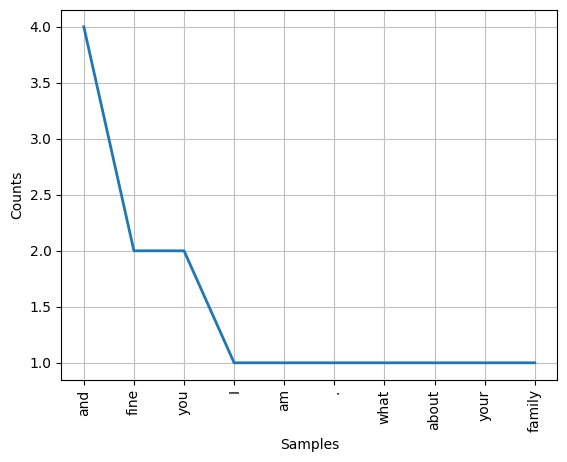

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
nltk.FreqDist(words).plot()

In [ ]:
nltk.download('averaged_perceptron_tagger')

In [ ]:
# pos

nltk.pos_tag(words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('I', 'PRP'),
 ('am', 'VBP'),
 ('fine', 'JJ'),
 ('and', 'CC'),
 ('fine', 'JJ'),
 ('.', '.'),
 ('and', 'CC'),
 ('what', 'WP'),
 ('about', 'IN'),
 ('you', 'PRP'),
 ('and', 'CC'),
 ('your', 'PRP$'),
 ('family', 'NN'),
 ('and', 'CC'),
 ('you', 'PRP')]

In [ ]:
# concordance  --> shows occurance of a word within a context window

nltk.Text(words).concordance("fine")

Displaying 2 of 2 matches:
I am fine and fine . and what about you and yo
I am fine and fine . and what about you and your family


In [ ]:
# levistain similarity measure

nltk.edit_distance("hai", "hello")

4

In [ ]:
# match words

nltk.Text(words).similar('anded')

No matches


## **Text blob** things


In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

text = "TextBlob is a simple library for processing textual data."
blob = TextBlob(text)

In [ ]:
words = blob.words
words

WordList(['TextBlob', 'is', 'a', 'simple', 'library', 'for', 'processing', 'textual', 'data'])

In [ ]:
blob.sentences

[Sentence("TextBlob is a simple library for processing textual data.")]

In [ ]:
# pos
blob.tags

[('TextBlob', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('simple', 'JJ'),
 ('library', 'NN'),
 ('for', 'IN'),
 ('processing', 'VBG'),
 ('textual', 'JJ'),
 ('data', 'NNS')]

In [ ]:
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [ ]:
# nouns

blob.noun_phrases

WordList(['textblob', 'simple library', 'processing textual data'])

In [ ]:
blob.sentiment

Sentiment(polarity=0.0, subjectivity=0.35714285714285715)

In [ ]:
# plural form of a word

blob.words[0].pluralize()

'TextBlobs'

In [ ]:
#lemma

blob.words[0].lemmatize()

'TextBlob'

In [ ]:
word = "I am nooot caming for the partyy"

blob = TextBlob(word)
corrected = blob.correct()
corrected

TextBlob("I am not coming for the party")

In [ ]:
# grams

blob.ngrams(2)

[WordList(['I', 'am']),
 WordList(['am', 'nooot']),
 WordList(['nooot', 'caming']),
 WordList(['caming', 'for']),
 WordList(['for', 'the']),
 WordList(['the', 'partyy'])]

In [ ]:
blob.parse()

'I/PRP/B-NP/O am/VBP/B-VP/O nooot/NN/B-NP/O caming/VBG/B-VP/O for/IN/B-PP/B-PNP the/DT/B-NP/I-PNP partyy/NN/I-NP/I-PNP'

In [ ]:
blob.word_counts

defaultdict(int,
            {'i': 1,
             'am': 1,
             'nooot': 1,
             'caming': 1,
             'for': 1,
             'the': 1,
             'partyy': 1})